In [6]:
#https://analyticsindiamag.com/step-by-step-guide-to-reviews-classification-using-svc-naive-bayes-random-forest/
#!pip install fastai==2.0.10 torch==1.6 fastcore==1.0.0

In [11]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [12]:
dataset =pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
corpus=[]
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [15]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [16]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [17]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
#Clasiification
# Fitting Naive Bayes
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


#Support Vector
SVC_classifier = SVC(kernel = 'rbf')
SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

In [20]:
#Confusion Matrices
cm_NB = confusion_matrix(y_test, y_pred_NB)
cm_RandFor = confusion_matrix(y_test, y_pred_rf)
cm_SVC = confusion_matrix(y_test, y_pred_SVC)

In [21]:
print(cm_NB)

[[55 42]
 [12 91]]


In [22]:
print(cm_RandFor)

[[87 10]
 [46 57]]


In [23]:
print(cm_SVC)

[[90  7]
 [46 57]]


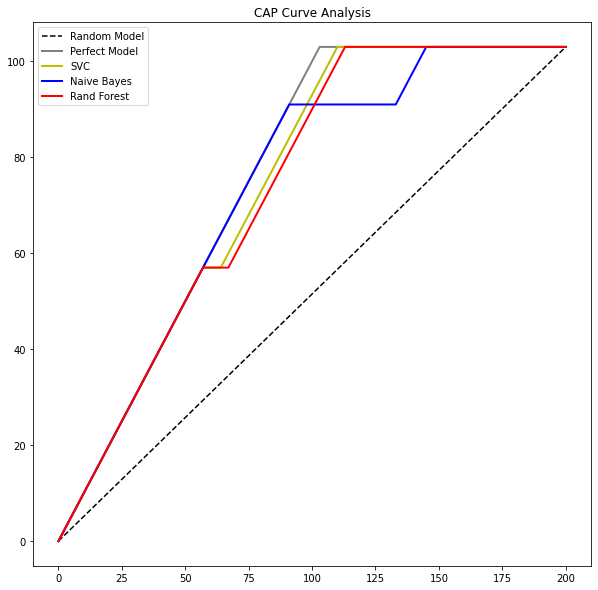

In [24]:
#CAP Analysis
total = len(y_test) 
one_count = np.sum(y_test)
zero_count = total - one_count 


lm_NB = [y for _, y in sorted(zip(y_pred_NB, y_test), reverse = True)] 
lm_SVC = [y for _, y in sorted(zip(y_pred_SVC, y_test), reverse = True)] 
lm_RandFor = [y for _, y in sorted(zip(y_pred_rf, y_test), reverse = True)] 


x = np.arange(0, total + 1) 
y_NB = np.append([0], np.cumsum(lm_NB)) 
y_SVC = np.append([0], np.cumsum(lm_SVC)) 
y_RandFor = np.append([0], np.cumsum(lm_RandFor)) 

plt.figure(figsize = (10, 10))
plt.title('CAP Curve Analysis')
plt.plot([0, total], [0, one_count], c = 'k', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model') 
plt.plot(x, y_SVC, c = 'y', label = 'SVC', linewidth = 2)
plt.plot(x, y_NB, c = 'b', label = 'Naive Bayes', linewidth = 2)
plt.plot(x, y_RandFor, c = 'r', label = 'Rand Forest', linewidth = 2)
plt.legend()

